IMPORTACION DE LIBRERIAS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

LECTURA DE DATOS

In [3]:
Lectura=pd.read_csv("datosConcatenadossinCI.csv")

VISUALIZAMOS LOS PRIMEROS DATOS

In [4]:
Lectura.head()

,Unnamed: 0,danho,ciclo,Cod.Asign,Asignatura,Cod.Car.Sec,Cod.Curso,Convocatoria,Anho,Semestre,...,Segundo.Par,AOT,Primer.Rec,Segundo.Rec,Nota.Final,Tercer.Par,Asis,Cuarto.Par,4P_60,id_anony
0,0,2012,1,2402,COMBUSTION,INT9MECANI,13,1,2012,1,...,0,0,0,0,NaN,0.0,1.0,NaN,NaN,es_0
1,1,2012,1,2402,COMBUSTION,MEC9-OPT,13,1,2012,1,...,14,8,0,0,1F-5,0.0,1.0,NaN,NaN,es_1
2,2,2012,1,2402,COMBUSTION,INT9MECANI,13,1,2012,1,...,23,9,0,0,1F-5,0.0,1.0,NaN,NaN,es_2
3,3,2012,1,2402,COMBUSTION,MEC9-OPT,13,1,2012,1,...,14,8,0,0,"1F-1,2F-2",0.0,1.0,NaN,NaN,es_3
4,4,2012,1,2402,COMBUSTION,MEC9-OPT,13,1,2012,1,...,4,8,0,0,NaN,0.0,1.0,NaN,NaN,es_4


In [ ]:
#Visualizamos que tamaño tienen los datos
#print('Tamaño de los datos: ',Lectura.shape)

In [ ]:
#Hay valores nulos en los datos?
#Lectura.info()

ANALIZAMOS LOS CODIGO DE CARRERAS

In [5]:
np.unique(Lectura["Cod.Car.Sec"])

array(['CGF-175-09', 'CGF-PLS09 ', 'CGF-PLS13 ', 'CIV-175-09',
       'CIV-PLS09 ', 'CIV-PLS13 ', 'ECA-175-09', 'ECA-PLS09 ',
       'ECA-PLS13 ', 'ECA9-OPT  ', 'ELE-175-09', 'ELE-PLS09 ',
       'ELE-PLS13 ', 'IND-175-09', 'IND-PLS09 ', 'IND-PLS13 ',
       'INT9-PROYT', 'INT9CONSTR', 'INT9ELECTR', 'INT9G-ECO ',
       'INT9MECANI', 'INT9ORTERR', 'INT9RNYMA ', 'INT9SANEHI',
       'INT9SDIGYT', 'INT9TRANSP', 'MCT-175-09', 'MCT-PLS09 ',
       'MCT-PLS13 ', 'MCT9-OPT  ', 'MEC-175-09', 'MEC-PLS09 ',
       'MEC-PLS13 ', 'MEC9-OPT  ', 'TIVAS     '], dtype=object)

SEPARAMOS LOS DATOS PARA SER ANALIZDOS:
En este caso seleccione  los de la carrera de ING. CIVIL

In [6]:
civil=pd.DataFrame(columns=Lectura.columns)
for car in ['CIV-175-09','CIV-PLS09 ', 'CIV-PLS13 ']:
    print(car)
    civil=pd.concat([civil, Lectura[Lectura["Cod.Car.Sec"]==car]], axis=0)

CIV-175-09
CIV-PLS09 
CIV-PLS13 


MATERIAS DEL PRIMER SEMESTRE

In [7]:
primerS=civil[ (civil["Cod.Curso"]==1) & (civil["Aprobado"]=="S")]
CprimerS=np.unique(primerS["Asignatura"])
CprimerS


array(['ALGEBRA LINEAL 1', 'CALCULO 1', 'DIBUJO TECNICO', 'FISICA 1',
       'GEOMETRIA ANALITICA', 'GEOMETRIA DESCRIPTIVA'], dtype=object)

FILTRO LOS ID QUE CURSARON TODAS MATERIAS DEL CUARTO SEMESTRE

In [8]:
newdata=pd.DataFrame(columns=civil.columns)
for mat in ['CALCULO 4', 'DINAMICA', 'ESTRUCTURAS 1', 'FISICA 4',
       'MECANICA DE MATERIALES 1']:
    newdata=pd.concat([newdata, civil[civil["Asignatura"]==mat]], axis=0)
    print(mat)
print('Cantidad de elementos',newdata.shape)

CALCULO 4
DINAMICA
ESTRUCTURAS 1
FISICA 4
MECANICA DE MATERIALES 1
Cantidad de elementos (8848, 23)


SEGUIDAMENTE FILTRO SOLO LOS QUE TIENEN APROBADO ESAS MATERIAS

In [9]:
df=newdata[newdata["Aprobado"]=="S"]
print('Cantidad de elementos',df.shape)


Cantidad de elementos (4054, 23)


LUEGO VISUALIZAMOS LA CANTIDAD DE ESTUDIANTES REALES

In [10]:
estudiantes=np.unique(df['id_anony'])
materias=np.unique(df['Asignatura'])
print(len(estudiantes))

968


In [ ]:
#nuevo=df[df.id_anony.values=='es_4160']
#nuevo=civil[civil.id_anony.values=='es_4160']
#nuevo

In [ ]:
#estudiantes

In [11]:
Alumnos=[]
Alumnos.clear()
Inicio=[]
Inicio.clear()
Duracion=[]
Duracion.clear()


In [12]:
for ides in estudiantes:
    registro=df[df.id_anony.values==ides]
    regis=civil[civil.id_anony.values==ides]
    cant=np.unique(registro["Asignatura"])
    a=np.sum(cant=='CALCULO 4')
    a=a+np.sum(cant=='DINAMICA')
    a=a+np.sum(cant=='ESTRUCTURAS 1')
    a=a+np.sum(cant=='FISICA 4')
    a=a+np.sum(cant=='MECANICA DE MATERIALES 1')
    regi=np.sum((regis["Cod.Curso"].values==1))
    if (a==5)&(regi>0):
        ides
        AnhoIn=min(regis["danho"])
        AnhoFin=max(registro["danho"])
        Tiempo=AnhoFin-AnhoIn
        Alumnos.append(ides)
        Duracion.append(Tiempo)
        Inicio.append(AnhoIn)

In [13]:
Datos=pd.DataFrame({'Alumnos':Alumnos,'Ingreso':Inicio,'Duracion':Duracion})
Datos

,Alumnos,Ingreso,Duracion
0,es_1164,2012,4
1,es_1185,2012,3
2,es_1204,2012,8
3,es_1244,2012,5
4,es_1253,2012,4
...,...,...,...
415,es_4087,2018,2
416,es_4104,2018,2
417,es_4134,2018,2
418,es_4156,2018,2


In [ ]:
#Datos.iloc[:,0]

In [14]:
x=Datos.iloc[:,1].values
X=x.reshape(-1, 1)
y=Datos.iloc[:,2].values

#x = Datos["Ingreso"]
#y = Datos["Duracion"]

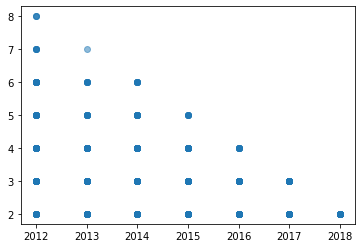

In [15]:
plt.scatter(x,y,alpha=0.5)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.1)
print("Train Data shape: " + str(X_train.shape)) #datos  
print("test Data shape: " + str(X_test.shape))
print("Train labels shape: " + str(Y_train.shape)) #datos  
print("test labels shape: " + str(Y_test.shape))

Train Data shape: (378, 1)
test Data shape: (42, 1)
Train labels shape: (378,)
test labels shape: (42,)


In [18]:
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [19]:
R_sq=lm.score(X_train,Y_train)
print('Coeficiente de determinacion',R_sq)
print('b0:',lm.intercept_)
print('b1:',lm.coef_)

Coeficiente de determinacion 0.1751137634581894
b0: 641.7146167658478
b1: [-0.31693319]


In [20]:
prediccion = lm.predict(X_test)
prediccion

array([3.72811199, 4.04504517, 3.72811199, 4.04504517, 4.04504517,
       4.04504517, 4.04504517, 3.4111788 , 2.77731243, 3.72811199,
       2.14344605, 4.04504517, 4.04504517, 4.04504517, 3.72811199,
       3.4111788 , 3.09424561, 3.72811199, 3.4111788 , 3.09424561,
       3.09424561, 3.4111788 , 2.14344605, 3.72811199, 3.4111788 ,
       3.4111788 , 3.4111788 , 4.04504517, 4.04504517, 3.09424561,
       3.09424561, 2.46037924, 4.04504517, 3.09424561, 4.04504517,
       3.72811199, 3.09424561, 2.46037924, 3.72811199, 3.09424561,
       2.77731243, 2.77731243])

In [21]:
np.mean(prediccion)

3.441362911749474

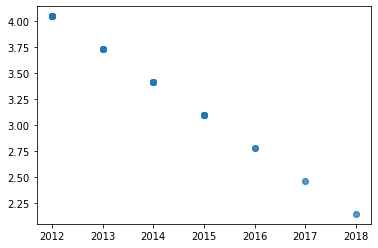

In [22]:
plt.scatter(X_test,prediccion,alpha=0.5)
plt.show()

In [153]:
civil=pd.DataFrame(columns=Lectura.columns)
for car in ['CIV-175-09','CIV-PLS09 ', 'CIV-PLS13 ']:
    print(car)
    civil=pd.concat([civil, Lectura[Lectura["Cod.Car.Sec"]==car]], axis=0)


CIV-175-09
CIV-PLS09 
CIV-PLS13 


In [165]:
civil=civil[civil["Cod.Curso"]<5]


newda=pd.DataFrame(columns=civil.columns)
for mat in ['CALCULO 4', 'DINAMICA', 'ESTRUCTURAS 1', 'FISICA 4',
       'MECANICA DE MATERIALES 1']:
    newda=pd.concat([newda, civil[civil["Asignatura"]==mat]], axis=0)
    print(mat)
print('Cantidad de elementos',newda.shape)

In [166]:
daf=civil[(civil["Aprobado"]=="S")|(civil["Aprobado"]=="N") ]

In [167]:
estudiantes=np.unique(daf['id_anony'])
materias=np.unique(daf['Asignatura'])
print(len(estudiantes))

2006


In [168]:
Alumnos=[]
Alumnos.clear()
Inicio=[]
Inicio.clear()
Duracion=[]
Duracion.clear()
Aprobado=[]
Aprobado.clear()
Mate=[]
Mate.clear()
for ides in estudiantes:
    registro=daf[daf.id_anony.values==ides]
    cant=np.unique(registro["Asignatura"])
    a=np.sum(cant=='CALCULO 4')
    a=a+np.sum(cant=='DINAMICA')
    a=a+np.sum(cant=='ESTRUCTURAS 1')
    a=a+np.sum(cant=='FISICA 4')
    a=a+np.sum(cant=='MECANICA DE MATERIALES 1')
    regi=np.sum((registro["Cod.Curso"].values==1))
    pasadas=registro[registro["Aprobado"]=="S"]
    pasadas=np.unique(registro["Asignatura"])
    if regi>0:
      if (a==5):
        AnhoIn=min(registro["danho"])
        AnhoFin=max(registro["danho"])
        Tiempo=AnhoFin-AnhoIn
        Alumnos.append(ides)
        Duracion.append(Tiempo)
        Inicio.append(AnhoIn)
        Aprobado.append(1)
        Mate.append(22)

      else :
        AnhoIn=min(registro["danho"])
        AnhoFin=max(registro["danho"])
        Tiempo=AnhoFin-AnhoIn
        Alumnos.append(ides)
        Duracion.append(Tiempo)
        Inicio.append(AnhoIn)
        Aprobado.append(0)
        Mate.append(len(pasadas))
        #print(ides,Tiempo)
    

In [169]:
Datos=pd.DataFrame({'Alumnos':Alumnos,'Ingreso':Inicio,'Duracion':Duracion,'Materias':Mate,'CB Fin':Aprobado})
Datos.head(50)

,Alumnos,Ingreso,Duracion,Materias,CB Fin
0,es_104,2012,9,14,0
1,es_1102,2012,1,11,0
2,es_1104,2012,4,22,1
3,es_1108,2012,7,11,0
4,es_1114,2012,4,22,1
5,es_1115,2012,5,22,1
6,es_1123,2012,4,14,0
7,es_1142,2012,1,12,0
8,es_1153,2012,4,15,0
9,es_1164,2012,4,22,1


In [33]:
x=Datos.iloc[:,1].values
X=x.reshape(-1, 1)
y=Datos.iloc[:,3].values

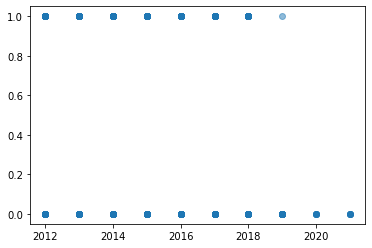

In [ ]:
plt.scatter(X,y,alpha=0.5)
plt.show()

In [77]:
X=Datos[['Ingreso','Duracion']].values

In [78]:
Y=Datos['Aprobado'].values

In [62]:
#plt.scatter(X,Y,s=40,c=1,cmap=plt.cm.Spectral)#para graficar
#plt.show()

In [ ]:
#'es_4104'
#primerS.loc[['es_4134']]

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [94]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)
print("Train Data shape: " + str(X_train.shape)) #datos  
print("test Data shape: " + str(X_test.shape))
print("Train labels shape: " + str(Y_train.shape)) #datos  
print("test labels shape: " + str(Y_test.shape))

Train Data shape: (869, 2)
test Data shape: (373, 2)
Train labels shape: (869,)
test labels shape: (373,)


In [95]:
log_regression=LogisticRegression()

In [96]:
log_regression.fit(X_train,Y_train)

LogisticRegression()

In [97]:
Y_pred=log_regression.predict(X_test)
Y_pred

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,

Diagnosticos del modelo

In [98]:
matrix_confu=metrics.confusion_matrix(Y_test,Y_pred)
matrix_confu

array([[147,  67],
       [ 89,  70]])

In [99]:
print("Precision del modelo:",metrics.accuracy_score(Y_test,Y_pred))

Precision del modelo: 0.5817694369973191
